In [1]:
"""
   Analyst:             JAINAM SHAH

   Project Name:        AirBNB NYC Exploration
   
   Purpose/Analysis ON: Data can help to predict which neighbourhoods_grp have the most listings and Prices.
                        And also listing with most Reviews to know preferred month/season of travellers.
                        
"""

'\n   Analyst:             JAINAM SHAH\n\n   Project Name:        AirBNB NYC Dataset Analysis\n   \n   Purpose/Analysis ON: Data can help to predict which neighbourhoods_grp have the most listings and Prices.\n                        And also listing with most Reviews to know preferred month/season of travellers.\n                        \n'

##### -x

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [73]:
cd C:\Users\Jammy\OneDrive\Desktop\Data analysis PDFs\ML\Projects for Analysis\Airbnb_NYC

C:\Users\Jammy\OneDrive\Desktop\Data analysis PDFs\ML\Projects for Analysis\Airbnb_NYC


In [74]:
nyc = pd.read_csv("AB_NYC_2019.csv",parse_dates=["last_review"])
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [75]:
nyc.shape

(48895, 16)

In [76]:
nyc.info()#null values check


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [77]:
nyc.describe()#mean is more than standard deviation means the data is scattered # also will have to perform scalling

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [78]:
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [79]:
nyc["neighbourhood_group"].unique() #for checking unique values for encoding as neighbourhood_drp is target column

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [80]:
nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### -x

#### Data Cleaning/EDA

##### Column Name

As there are only 16 Listings which do not have names out of 48895 we can fill it with "No Name", as we need the data for knowing which locality has most listings and there ratings

In [81]:
nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [82]:
nyc["name"].fillna("No_Name",inplace = True)

In [83]:
nyc.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### -x

#### Column Host_Name

Host_Name has 21 null values and it will also replaced by "No_HostName", As host can also be indentified with Host_ID

In [84]:
nyc["host_name"].replace(np.nan,"No_HostName",inplace = True)

In [85]:
nyc["host_name"].isnull().sum()

0

#### -x

In [86]:
nyc.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Column Last_Review

Here Review data is unknown with 10042 null values in it, As i have parsed the last_review column in date format now i will separate month from it to know the season in which these reviews are written, Also separating month from the Last_Review.

And drop Last_Review column as we already have the month of that column

We will see it to analyse the Season wise, Price Prediction of Travels

In [87]:
nyc["last_review"].dtype

dtype('<M8[ns]')

In [88]:
nyc["last_review"].isnull().sum()

10052

In [89]:
nyc["Season_Month"] = pd.to_datetime(nyc["last_review"], format = "%Y/%m/%d").dt.month
nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Season_Month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,10.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,7.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,NaN


In [90]:
nyc["Season_Month"].unique()

array([10.,  5., nan,  7., 11.,  6., 12.,  1.,  8.,  4.,  9.,  3.,  2.])

In [91]:
nyc.drop(["last_review"], axis = 1, inplace = True)

In [92]:
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Season_Month'],
      dtype='object')

In [93]:
nyc["Season_Month"].isnull().sum()

10052

In [94]:
nyc.Season_Month.mode()

0    6.0
dtype: float64

In [95]:
nyc["Season_Month"]

0        10.0
1         5.0
2         NaN
3         7.0
4        11.0
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: Season_Month, Length: 48895, dtype: float64

In [96]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [97]:
nyc["Season_Month"].fillna(nyc["Season_Month"].mean(),inplace = True)

In [98]:
nyc["Season_Month"] = nyc["Season_Month"].apply(np.int64)

In [99]:
nyc["Season_Month"].isnull().sum()

0

In [100]:
nyc["Season_Month"].unique()

array([10,  5,  6,  7, 11, 12,  1,  8,  4,  9,  3,  2], dtype=int64)

#### Column Reviews_Per_Month

Reviews_Per_Month has 10042 null values which can be replaced with , Basically The column represents how many number of reviews were given by customers

In [101]:
nyc["reviews_per_month"].dtype

dtype('float64')

In [102]:
nyc.reviews_per_month.mean()

1.3732214298586884

In [103]:
nyc["reviews_per_month"] = nyc["reviews_per_month"].fillna(nyc["reviews_per_month"].mean())

In [104]:
nyc["reviews_per_month"].isnull().sum()

0

#### -x

In [105]:
nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Season_Month                      0
dtype: int64

#### Column Availability_365

Column Availability_365 has 17533 rows or listings which means these rows are good to nothing if they are not available even a signle day

In [106]:
nyc[nyc.availability_365 ==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Season_Month
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,11
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.400000,1,0,10
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.990000,1,0,7
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,0.220000,1,0,10
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.070000,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,1.373221,1,0,6
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,1.373221,1,0,6
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,1.373221,1,0,6
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,1.373221,1,0,6


#### Correlation between columns

In [107]:
corr1 = nyc.corr()
corr1

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Season_Month
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.253252,0.133272,0.085468,-0.049675
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.255046,0.154950,0.203492,-0.028671
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.009115,0.019517,-0.010983,-0.002930
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731,0.002047
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829,0.000034
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303,-0.013541
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028,0.003088
reviews_per_month,0.253252,0.255046,-0.009115,0.131599,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980,0.003138
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701,-0.022585
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000,-0.029374


<AxesSubplot:>

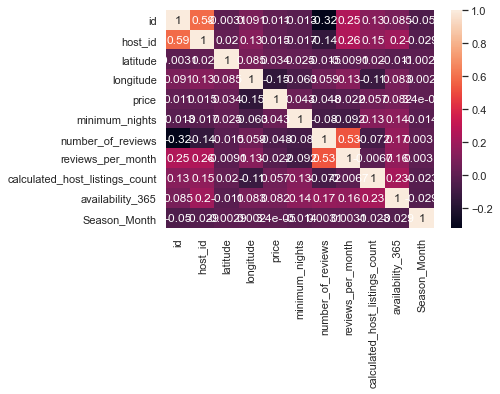

In [108]:
sns.heatmap(corr1,annot = True)

#### Barplot For Neighbourhood_group & price

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

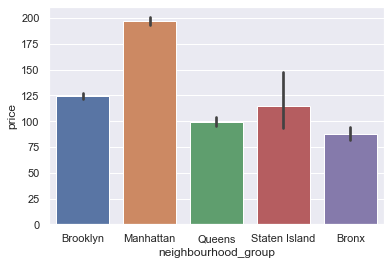

In [39]:
sns.barplot(nyc["neighbourhood_group"],nyc["price"])

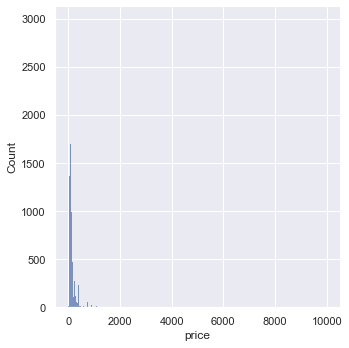

In [121]:
sns.displot(nyc["price"])

#### counting number of properties in each neighbourhood

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

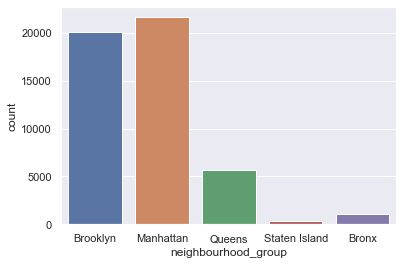

In [40]:
sns.countplot(nyc["neighbourhood_group"])

In [41]:
nyc["Season_Month"].value_counts()

6     23641
7      5937
5      4701
1      2773
4      2109
12     1770
8      1667
10     1546
9      1535
3      1288
11     1158
2       770
Name: Season_Month, dtype: int64

<AxesSubplot:xlabel='Season_Month', ylabel='count'>

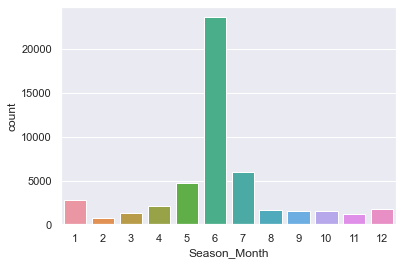

In [42]:
sns.countplot(nyc["Season_Month"])

### Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#### ONE-HOT Encoding: Neighbourhood_group

In [44]:
new_nyc = pd.get_dummies(nyc,columns = ["neighbourhood_group","room_type"],prefix = ["Group","R_type"])
new_nyc.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,availability_365,Season_Month,Group_Bronx,Group_Brooklyn,Group_Manhattan,Group_Queens,Group_Staten Island,R_type_Entire home/apt,R_type_Private room,R_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,365,10,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,355,5,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,365,6,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,194,7,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,0,11,0,0,1,0,0,1,0,0


In [45]:
new_nyc.drop(["id","host_id","name","host_name","price","neighbourhood","latitude","longitude","minimum_nights","number_of_reviews","availability_365","Season_Month"],axis = 1,inplace = True)

In [46]:
new_nyc.drop(["reviews_per_month"],axis = 1,inplace = True)

In [47]:
new_nyc

,calculated_host_listings_count,Group_Bronx,Group_Brooklyn,Group_Manhattan,Group_Queens,Group_Staten Island,R_type_Entire home/apt,R_type_Private room,R_type_Shared room
0,6,0,1,0,0,0,0,1,0
1,2,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
48890,2,0,1,0,0,0,0,1,0
48891,2,0,1,0,0,0,0,1,0
48892,1,0,0,1,0,0,1,0,0
48893,6,0,0,1,0,0,0,0,1


In [48]:
merged = pd.concat([nyc,new_nyc],axis = "columns")
merged.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,Season_Month,calculated_host_listings_count,Group_Bronx,Group_Brooklyn,Group_Manhattan,Group_Queens,Group_Staten Island,R_type_Entire home/apt,R_type_Private room,R_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,10,6,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,5,2,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,6,1,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,7,1,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,11,1,0,0,1,0,0,1,0,0


In [49]:
merged.drop(["id","host_id","name","host_name","neighbourhood_group","neighbourhood","room_type","calculated_host_listings_count","latitude","longitude"],axis = 1,inplace = True)
merged

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Season_Month,Group_Bronx,Group_Brooklyn,Group_Manhattan,Group_Queens,Group_Staten Island,R_type_Entire home/apt,R_type_Private room,R_type_Shared room
0,149,1,9,0.210000,365,10,0,1,0,0,0,0,1,0
1,225,1,45,0.380000,355,5,0,0,1,0,0,1,0,0
2,150,3,0,1.373221,365,6,0,0,1,0,0,0,1,0
3,89,1,270,4.640000,194,7,0,1,0,0,0,1,0,0
4,80,10,9,0.100000,0,11,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2,0,1.373221,9,6,0,1,0,0,0,0,1,0
48891,40,4,0,1.373221,36,6,0,1,0,0,0,0,1,0
48892,115,10,0,1.373221,27,6,0,0,1,0,0,1,0,0
48893,55,1,0,1.373221,2,6,0,0,1,0,0,0,0,1


In [50]:
merged.drop(["minimum_nights","number_of_reviews","reviews_per_month",],axis = 1,inplace = True)
merged

,price,availability_365,Season_Month,Group_Bronx,Group_Brooklyn,Group_Manhattan,Group_Queens,Group_Staten Island,R_type_Entire home/apt,R_type_Private room,R_type_Shared room
0,149,365,10,0,1,0,0,0,0,1,0
1,225,355,5,0,0,1,0,0,1,0,0
2,150,365,6,0,0,1,0,0,0,1,0
3,89,194,7,0,1,0,0,0,1,0,0
4,80,0,11,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,70,9,6,0,1,0,0,0,0,1,0
48891,40,36,6,0,1,0,0,0,0,1,0
48892,115,27,6,0,0,1,0,0,1,0,0
48893,55,2,6,0,0,1,0,0,0,0,1


In [51]:
merged.drop(["R_type_Entire home/apt","R_type_Private room","R_type_Shared room"],axis = 1,inplace = True)
merged

,price,availability_365,Season_Month,Group_Bronx,Group_Brooklyn,Group_Manhattan,Group_Queens,Group_Staten Island
0,149,365,10,0,1,0,0,0
1,225,355,5,0,0,1,0,0
2,150,365,6,0,0,1,0,0
3,89,194,7,0,1,0,0,0
4,80,0,11,0,0,1,0,0
...,...,...,...,...,...,...,...,...
48890,70,9,6,0,1,0,0,0
48891,40,36,6,0,1,0,0,0
48892,115,27,6,0,0,1,0,0
48893,55,2,6,0,0,1,0,0


#### Train/Test split

In [52]:
merged.columns

Index(['price', 'availability_365', 'Season_Month', 'Group_Bronx',
       'Group_Brooklyn', 'Group_Manhattan', 'Group_Queens',
       'Group_Staten Island'],
      dtype='object')

In [53]:
X = merged.drop(["price","availability_365","Season_Month"],axis = 1)
Y = merged.price

In [54]:
X

,Group_Bronx,Group_Brooklyn,Group_Manhattan,Group_Queens,Group_Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
48890,0,1,0,0,0
48891,0,1,0,0,0
48892,0,0,1,0,0
48893,0,0,1,0,0


In [55]:
Y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [56]:
X.shape

(48895, 5)

In [57]:
Y.shape

(48895,)

#### Train/Test Split

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 10, random_state = 42)

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
model1 = LinearRegression()
model1

LinearRegression()

In [118]:
model1.fit(X_train,Y_train)

LinearRegression()

#### Train/Test Score

In [119]:
model1.score(X_train,Y_train)

0.028207371030691708

In [120]:
model1.score(X_test,Y_test)

0.3368866074959548

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [65]:
model1 = [DecisionTreeRegressor,SVR,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor]

for mod in model1:
    reg = mod()
    reg = reg.fit(X_train,Y_train)
    print(mod , 'accuracy',reg.score(X_test,Y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.02882101169764817
<class 'sklearn.svm._classes.SVR'> accuracy 0.0013529090706604352
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.028717270440243525
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.026575916097831054
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy 0.028522140058857115


In [66]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR()))
models.append(('AdaBoost', AdaBoostRegressor()))



results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,X_train,Y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

In [ ]:
from sklearn.metrics import confusion_matrix